10.	Using past data, predict the “Player of the Match” using features like runs scored, wickets taken, strike rate, etc.

In [51]:
#Preparing the Dataset for batting
batting = df.groupby(['match_id', 'batter']).agg({
    'batsman_runs': 'sum',
    'ball': 'count'
}).reset_index()
batting.columns = ['match_id', 'player', 'total_runs', 'balls_faced']
batting['strike_rate'] = (batting['total_runs'] / batting['balls_faced']) * 100

In [52]:
#for bowling:
bowling = df[df['is_wicket'] == 1].groupby(['match_id', 'bowler']).agg({
    'is_wicket': 'sum',
    'total_runs': 'sum',
    'ball': 'count'
}).reset_index()
bowling.columns = ['match_id', 'player', 'wickets', 'runs_conceded', 'balls_bowled']

In [58]:
#Merging batter + bowler stats, with player_of_the_match:
from pandas import merge
player_stats = pd.merge(batting, bowling, on=['match_id', 'player'], how='outer').fillna(0)

In [63]:
#Adding Player of the Match Label
matches_df = pd.read_excel("C:\\Users\\sivashree\\Desktop\\Skillslash\\Project by Vikas\\Python Project\\matches_2008-2024.xlsx") 

In [70]:
# Merging POTM into player_stats:
matches_df.rename(columns={'id': 'match_id'}, inplace=True)
pom_df = matches_df[['match_id', 'player_of_match']].drop_duplicates()

all_stats = pd.merge(player_stats, pom_df, on='match_id', how='left')
all_stats['is_pom'] = (all_stats['player'] == all_stats['player_of_match']).astype(int)
# Create binary label: 1 if player is POTM, else 0
all_stats['is_pom'] = (all_stats['player'] == all_stats['player_of_match']).astype(int)

In [71]:
# Droping unnecessary columns
final_df = all_stats.drop(columns=['match_id', 'player', 'player_of_match'])

# Define X (features) and y (target)
X = final_df.drop('is_pom', axis=1)
y = final_df['is_pom']

In [72]:
#Training a Classifier (Random Forest)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predicting & Evaluating
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3997
           1       0.48      0.29      0.36       214

    accuracy                           0.95      4211
   macro avg       0.72      0.63      0.67      4211
weighted avg       0.94      0.95      0.94      4211



Class 0 (Not Player of the Match)
Precision: 96% → When the model says someone is not the Player of the Match, it's right 96% of the time.

Recall: 98% → It correctly identifies 98% of not POTM players.

🌟 Class 1 (Player of the Match)
Precision: 48% → Half the time the model predicts someone as POTM, it's correct.

Recall: 29% → It only catches 29% of actual POTMs. So it's missing many!


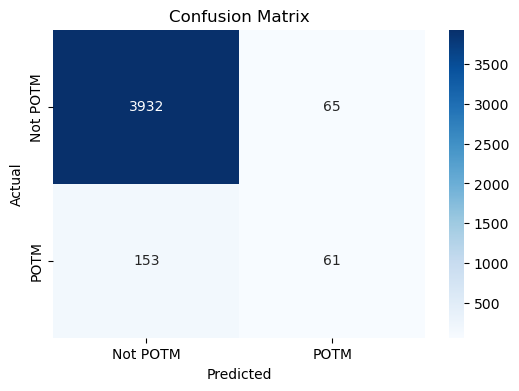

In [74]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not POTM', 'POTM'], yticklabels=['Not POTM', 'POTM'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

📈 Evaluation & Model Tuning

In [1]:
import pandas as pd
df = pd.read_excel("C:\\Users\\sivashree\\Desktop\\Skillslash\\Project by Vikas\\Python Project\\deliveries_2008-2024.xlsx")
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


11.	What evaluation metrics would you use for your regression and classification models? Why?

### 🔹 Regression Model Metrics
For models that predict numerical values (e.g., final inning score), we use:

- **MAE (Mean Absolute Error)**: Average of absolute errors.
- **MSE (Mean Squared Error)**: Penalizes large errors more than MAE.
- **RMSE (Root Mean Squared Error)**: Square root of MSE; in original unit.
- **R² Score**: Explains how much variance is captured by the model (closer to 1 = better).

---

### 🔹 Classification Model Metrics
For models that predict categories (e.g., run prediction, Player of the Match):

- **Accuracy**: Ratio of correct predictions.
- **Precision**: How many predicted positives were actually positive.
- **Recall**: How many actual positives were predicted correctly.
- **F1-Score**: Harmonic mean of Precision and Recall.
- **Classification Report**: Shows all the above for each class.


#Regression Metrics

In [5]:
# Selecting numeric features for regression
X = df[['over', 'ball', 'batsman_runs']]  # you can add more features later
y = df['total_runs']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Replacing y_test and y_pred with variables
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 0.13408655719079973
Mean Squared Error (MSE): 0.10793603564505477
Root Mean Squared Error (RMSE): 0.32853620142239237
R-squared (R²): 0.9589731907482163


🎯 Classification Model

In [8]:
 #Step 1: Selecting features (X) and target (y)

In [9]:
X = df[['over', 'ball']] 
y = df['batsman_runs']  # Classifying as 0, 1, 2, 4, or 6
y = y[y.isin([0, 1, 2, 4, 6])]
X = X.loc[y.index]

#📌 Step 2: Train-test split

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#📌 Step 3: Training a classifier

In [12]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

✅ Step 4: Classification Evaluation Metrics

C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93     18041
           1       1.00      0.89      0.94     21728
           2       1.00      0.94      0.97      3547
           3       0.00      0.00      0.00       184
           4       0.97      0.98      0.98      5993
           5       0.00      0.00      0.00        88
           6       0.99      1.00      1.00      2581
           7       0.00      0.00      0.00        22

    accuracy                           0.94     52184
   macro avg       0.60      0.60      0.60     52184
weighted avg       0.94      0.94      0.94     52184

✅ Accuracy Score: 0.942971025601717


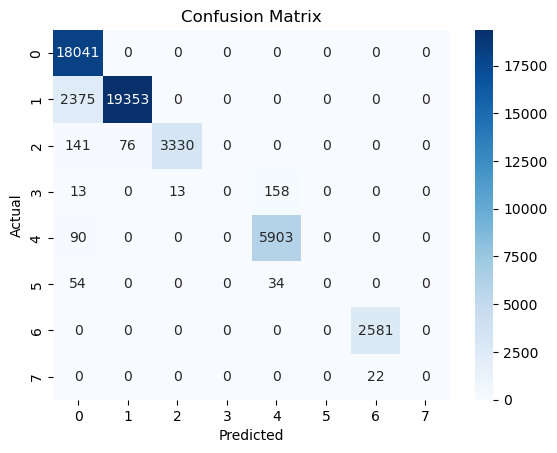

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("🔍 Classification Report:\n", classification_report(y_test, y_pred))
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))

#Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

12.	How would you use cross-validation to improve model reliability?

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

In [16]:
#Defining the model
model = LogisticRegression(max_iter=1000)

In [17]:
#Apply 5-Fold Cross-Validation----This will automatically split your data into 5 folds
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))

Cross-Validation Scores: [0.43960396 0.43925791 0.42778867 0.41696466 0.41750298]
Mean Accuracy: 0.4282236364753076


13.What methods would you use to handle class imbalance if wickets happen in <10% of deliveries?

In [23]:
#✅ Step 1: Using class_weight='balanced' in the model Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [26]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (208057, 2)
X_test: (52015, 2)
y_train: (208057,)
y_test: (52015,)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predicting on X_test only!
y_pred = model.predict(X_test)

# Evaluating
print("Shapes:")
print("y_test:", len(y_test))
print("y_pred:", len(y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Shapes:
y_test: 52015
y_pred: 52015

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.63      0.52     20853
           1       0.41      0.48      0.44     19237
           2       0.00      0.00      0.00      3271
           4       0.00      0.00      0.00      5989
           6       0.00      0.00      0.00      2665

    accuracy                           0.43     52015
   macro avg       0.17      0.22      0.19     52015
weighted avg       0.33      0.43      0.37     52015



C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
# Trying Class Weight Balancing in Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.53      0.50     20853
           1       0.45      0.05      0.10     19237
           2       0.07      0.05      0.06      3271
           4       0.09      0.05      0.06      5989
           6       0.07      0.55      0.13      2665

    accuracy                           0.27     52015
   macro avg       0.23      0.25      0.17     52015
weighted avg       0.37      0.27      0.25     52015



In [29]:
!pip install imbalanced-learn

In [30]:
#✅ Step 2: Trying Oversampling with SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

# Applying only to training data
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

In [32]:
#Training model on balanced data
model = LogisticRegression(max_iter=1000)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.52      0.49     20853
           1       0.44      0.04      0.08     19237
           2       0.07      0.06      0.06      3271
           4       0.09      0.06      0.07      5989
           6       0.07      0.55      0.13      2665

    accuracy                           0.26     52015
   macro avg       0.23      0.24      0.17     52015
weighted avg       0.37      0.26      0.25     52015



In [33]:
#Trying Random Forest (or Decision Tree)
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_resampled, y_resampled)
y_pred_rf = rf_model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.59      0.15      0.24     20853
           1       0.45      0.42      0.43     19237
           2       0.08      0.15      0.10      3271
           4       0.16      0.30      0.21      5989
           6       0.08      0.34      0.13      2665

    accuracy                           0.28     52015
   macro avg       0.27      0.27      0.22     52015
weighted avg       0.43      0.28      0.29     52015



In [34]:
#4. Trying class_weight='balanced' with SMOTE for stronger results
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.52      0.49     20853
           1       0.44      0.04      0.08     19237
           2       0.07      0.06      0.06      3271
           4       0.09      0.06      0.07      5989
           6       0.07      0.55      0.13      2665

    accuracy                           0.26     52015
   macro avg       0.23      0.24      0.17     52015
weighted avg       0.37      0.26      0.25     52015



Time Series & Sequence Modeling

14.	Can you model run scoring as a time series (over-wise or ball-wise)? Try using LSTM or ARIMA.

In [35]:
# Group by over and sum runs
df_overwise = df.groupby(['match_id', 'over'])['total_runs'].sum().reset_index()

# Optional: Focus on one match (ARIMA works best on one continuous series)
match_data = df_overwise[df_overwise['match_id'] == df_overwise['match_id'].unique()[0]]

# Reseting index for plotting
match_data = match_data.reset_index(drop=True)

In [36]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fitting ARIMA model
model = ARIMA(match_data['total_runs'], order=(1, 1, 1))  # (p, d, q)
model_fit = model.fit()

# Forecasting next 5 overs
forecast = model_fit.forecast(steps=5)
print("Forecasted Runs (next 5 overs):", forecast.tolist())

Forecasted Runs (next 5 overs): [13.22076783450565, 15.80323247498773, 15.043584763932499, 15.267039767290736, 15.201309116359834]


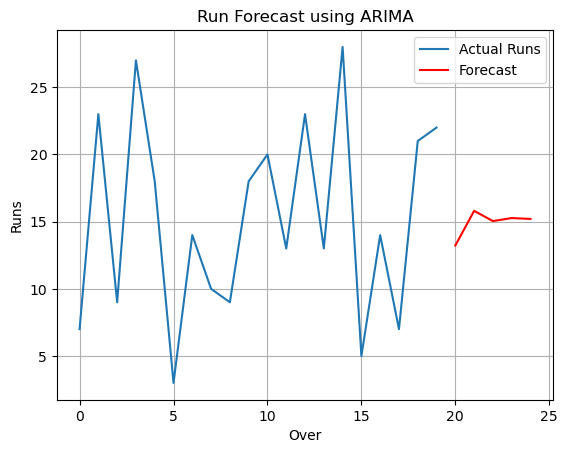

In [37]:
# Plot original + forecast
plt.plot(match_data['total_runs'], label='Actual Runs')
plt.plot(range(len(match_data), len(match_data)+5), forecast, label='Forecast', color='red')
plt.title('Run Forecast using ARIMA')
plt.xlabel('Over')
plt.ylabel('Runs')
plt.legend()
plt.grid()
plt.show()

15.	How would you implement a rolling average or exponential moving average of batsman performance for use as features in a predictive model?

In [39]:
#📌 Step 1: Group Data by Batsman & Match
df_sorted = df.sort_values(by=['batter', 'match_id', 'over', 'ball'])

In [40]:
#📌 Step 2: Calculating Cumulative Runs
df_sorted['cumulative_runs'] = df_sorted.groupby('batter')['batsman_runs'].cumsum()

In [41]:
#📌 Step 3: Rolling Average (Last 5 Balls/Deliveries)
df_sorted['rolling_avg_5'] = df_sorted.groupby('batter')['batsman_runs'].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)

In [42]:
#📌 Step 4: Exponential Moving Average (More weight to recent)
df_sorted['ema_5'] = df_sorted.groupby('batter')['batsman_runs'].transform(lambda x: x.ewm(span=5, adjust=False).mean())

In [43]:
df_sorted[['batter', 'match_id', 'over', 'ball', 'batsman_runs', 'rolling_avg_5', 'ema_5']].head(10)

,batter,match_id,over,ball,batsman_runs,rolling_avg_5,ema_5
67751,A Ashish Reddy,548346,13,1,0,0.00,0.000000
67752,A Ashish Reddy,548346,13,2,0,0.00,0.000000
67753,A Ashish Reddy,548346,13,3,0,0.00,0.000000
67754,A Ashish Reddy,548346,13,4,1,0.25,0.333333
67756,A Ashish Reddy,548346,13,6,6,1.40,2.222222
67760,A Ashish Reddy,548346,14,4,2,1.80,2.148148
67761,A Ashish Reddy,548346,14,5,0,1.80,1.432099
67762,A Ashish Reddy,548346,14,6,1,2.00,1.288066
67763,A Ashish Reddy,548346,15,1,0,1.80,0.858711
67764,A Ashish Reddy,548346,15,2,0,0.60,0.572474


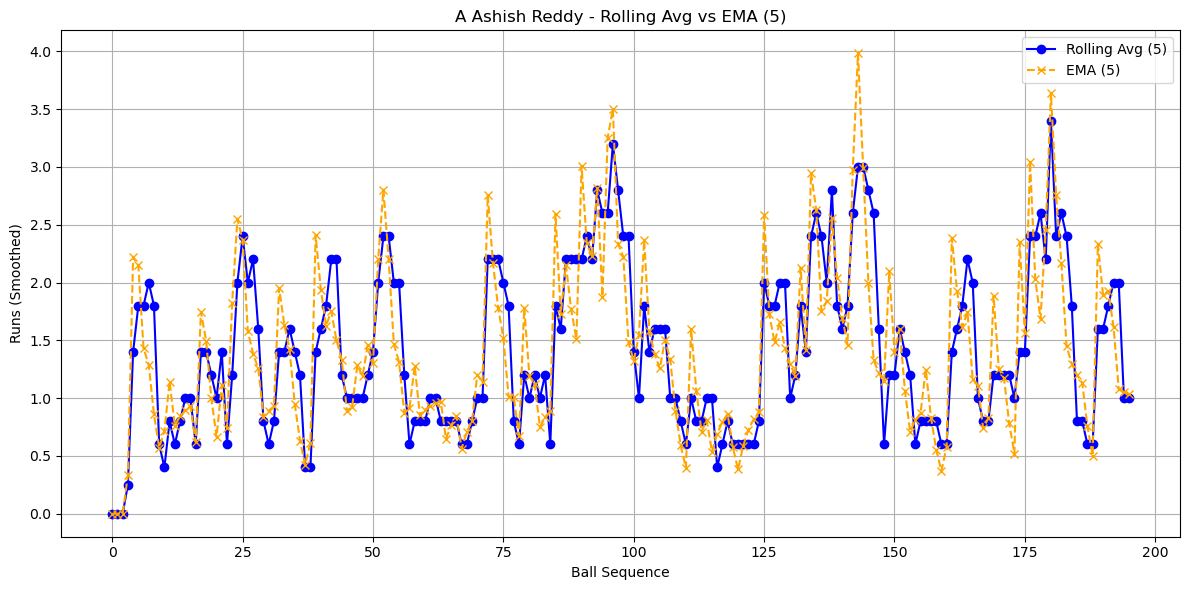

In [45]:
# Filtering data for a specific batter 
batsman_df = df_sorted[df_sorted['batter'] == 'A Ashish Reddy'].copy()
batsman_df = batsman_df.reset_index(drop=True)
plt.figure(figsize=(12, 6))
plt.plot(batsman_df.index, batsman_df['rolling_avg_5'], label='Rolling Avg (5)', marker='o', color='blue')
plt.plot(batsman_df.index, batsman_df['ema_5'], label='EMA (5)', linestyle='--', marker='x', color='orange')
plt.title("A Ashish Reddy - Rolling Avg vs EMA (5)")
plt.xlabel("Ball Sequence")
plt.ylabel("Runs (Smoothed)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()